In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Create Latitude and Longitude Combinations

In [2]:
# Add code that generates the latitudes and longitudes, but first, they need to be stored so that we can 
# access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.

# To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) 
# and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# When we run this cell, the output is a zip object in memory. 
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 

# If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
# where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

### Unpack a zip object into a list:

In [3]:
# Let's unpack our lat_lngs zip object into a list. 
# This way, we only need to create a set of random latitudes and longitudes once

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# NOTE: You can only unzip a zipped tuple once before it is removed from the computer's memory.

In [4]:
# Now that we have our ordered pairs of latitudes and longitudes in a list, we can iterate through the 
# list of tuples and find the nearest city to those coordinates.

In [5]:
# Import citipy
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

609

In [7]:
# Psuedocode to map out, at a high level, how we will get the weather data for each city for the website.

    # Import our dependencies and initialize counters and an empty list that will hold the weather data.

    # Loop through the cities list.

    # Group the cities in sets of 50 to log the process as we find the weather data for each city.
    
        # Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.

    # Build the city_url or endpoint for each city.

    # Log the URL and the record and set numbers.

    # Make an API request for each city.
    
    # Parse the JSON weather data for the following:
        # City, country, and date
        # Latitude and longitude
        # Maximum temperature
        # Humidity
        # Cloudiness
        # Wind speed

    #Add the data to a list in a dictionary format and then convert the list to a DataFrame.


### Import Dependencies, and Initialize an Empty List and Counters:

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Create an empty list to hold the weather data.
city_data = []


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | opuwo
Processing Record 2 of Set 1 | nome
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | saint george
Processing Record 7 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 8 of Set 1 | los llanos de aridane
Processing Record 9 of Set 1 | nabire
Processing Record 10 of Set 1 | marawi
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | semme
Processing Record 15 of Set 1 | belmonte
Processing Record 16 of Set 1 | alyangula
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | dunedin
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | salinopolis
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set

Processing Record 38 of Set 4 | carnarvon
Processing Record 39 of Set 4 | vanimo
Processing Record 40 of Set 4 | port-gentil
Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | touros
Processing Record 43 of Set 4 | asau
Processing Record 44 of Set 4 | clyde river
Processing Record 45 of Set 4 | mehran
Processing Record 46 of Set 4 | salta
Processing Record 47 of Set 4 | mokolo
Processing Record 48 of Set 4 | borama
City not found. Skipping...
Processing Record 49 of Set 4 | olinda
Processing Record 50 of Set 4 | bargal
City not found. Skipping...
Processing Record 1 of Set 5 | vostok
Processing Record 2 of Set 5 | alofi
Processing Record 3 of Set 5 | bria
Processing Record 4 of Set 5 | dudinka
Processing Record 5 of Set 5 | manokwari
Processing Record 6 of Set 5 | zhangye
Processing Record 7 of Set 5 | nelson bay
Processing Record 8 of Set 5 | roald
Processing Record 9 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 10 of Set 5 | gamarra
Process

Processing Record 31 of Set 8 | belyy yar
Processing Record 32 of Set 8 | port macquarie
Processing Record 33 of Set 8 | storforshei
Processing Record 34 of Set 8 | dharchula
Processing Record 35 of Set 8 | bozoum
Processing Record 36 of Set 8 | qasigiannguit
Processing Record 37 of Set 8 | cassilandia
Processing Record 38 of Set 8 | kailua
Processing Record 39 of Set 8 | celestun
Processing Record 40 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 41 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 42 of Set 8 | cabo san lucas
Processing Record 43 of Set 8 | lacarak
Processing Record 44 of Set 8 | gat
Processing Record 45 of Set 8 | marzuq
Processing Record 46 of Set 8 | teluk nibung
Processing Record 47 of Set 8 | kuche
City not found. Skipping...
Processing Record 48 of Set 8 | petauke
Processing Record 49 of Set 8 | progreso
Processing Record 50 of Set 8 | karasjok
Processing Record 1 of Set 9 | nago
Processing Record 2 of Set 9 | mackay
Pro

Processing Record 17 of Set 12 | buenos aires
Processing Record 18 of Set 12 | emerald
Processing Record 19 of Set 12 | edd
Processing Record 20 of Set 12 | les cayes
Processing Record 21 of Set 12 | garliava
Processing Record 22 of Set 12 | dwarka
Processing Record 23 of Set 12 | cervo
Processing Record 24 of Set 12 | obera
Processing Record 25 of Set 12 | naze
Processing Record 26 of Set 12 | verkhneyarkeyevo
Processing Record 27 of Set 12 | fortuna
Processing Record 28 of Set 12 | kathu
Processing Record 29 of Set 12 | burns lake
Processing Record 30 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 31 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 32 of Set 12 | scottsbluff
Processing Record 33 of Set 12 | mogadishu
Processing Record 34 of Set 12 | ekuvukeni
Processing Record 35 of Set 12 | nicoya
Processing Record 36 of Set 12 | grindavik
Processing Record 37 of Set 12 | tiznit
Processing Record 38 of Set 12 | mecca
Processing Record 39 

In [11]:
len(city_data)

561

### Create a DataFrame of City Weather Data:

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Opuwo,-18.0607,13.8400,67.51,30,71,1.72,NA,2021-11-30 02:19:25
1,Nome,64.5011,-165.4064,-7.53,59,1,5.75,US,2021-11-30 02:19:26
2,Bluff,-46.6000,168.3333,62.80,75,92,6.04,NZ,2021-11-30 02:19:26
3,Cape Town,-33.9258,18.4232,63.09,84,90,6.91,ZA,2021-11-30 02:19:27
4,Saint George,37.1041,-113.5841,57.79,34,1,0.00,US,2021-11-30 02:19:27
5,Los Llanos De Aridane,28.6585,-17.9182,60.55,76,75,4.00,ES,2021-11-30 02:19:28
6,Nabire,-3.3667,135.4833,88.48,60,97,2.35,ID,2021-11-30 02:15:55
7,Marawi,7.9986,124.2928,74.64,69,77,3.06,PH,2021-11-30 02:19:29
8,Rikitea,-23.1203,-134.9692,76.44,78,5,20.33,PF,2021-11-30 02:15:09
9,Kapaa,22.0752,-159.3190,80.58,75,90,5.01,US,2021-11-30 02:17:06


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Opuwo,NA,2021-11-30 02:19:25,-18.0607,13.8400,67.51,30,71,1.72
1,Nome,US,2021-11-30 02:19:26,64.5011,-165.4064,-7.53,59,1,5.75
2,Bluff,NZ,2021-11-30 02:19:26,-46.6000,168.3333,62.80,75,92,6.04
3,Cape Town,ZA,2021-11-30 02:19:27,-33.9258,18.4232,63.09,84,90,6.91
4,Saint George,US,2021-11-30 02:19:27,37.1041,-113.5841,57.79,34,1,0.00


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Get Data for Plotting

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/29/21'

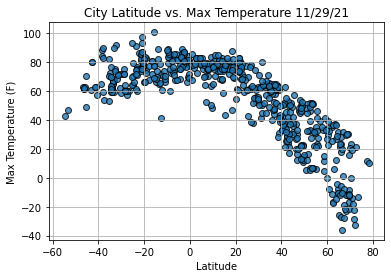

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

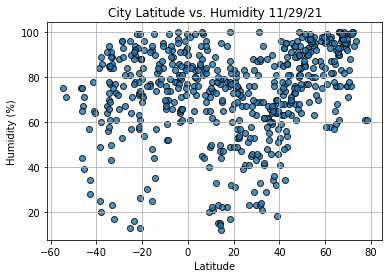

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

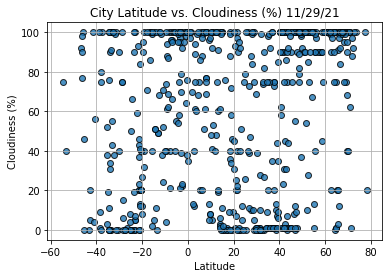

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

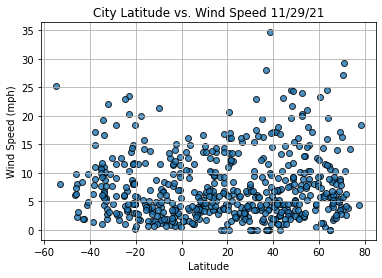

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Find the Correlation Between Latitude and Maximum Temperature

In [22]:
# Import Matplotlib.
import matplotlib.pyplot as plt

### Create the function to  perform linear regression on the weather data and plot a regression line and the equation with the data

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and 
# plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

   
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

### Create the Hemisphere DataFrames

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

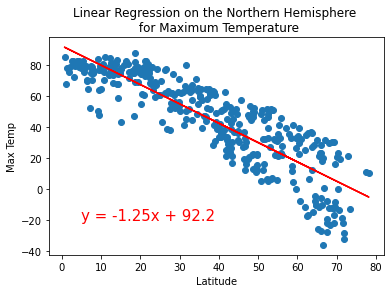

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,-20))


### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

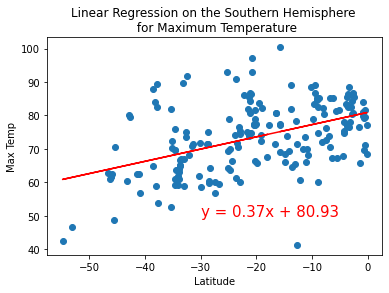

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,50))

### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

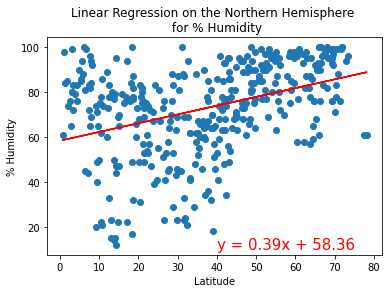

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

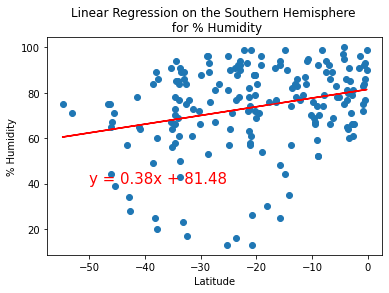

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,40))

## Find the Correlation Between Latitude and Percent Cloudiness

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

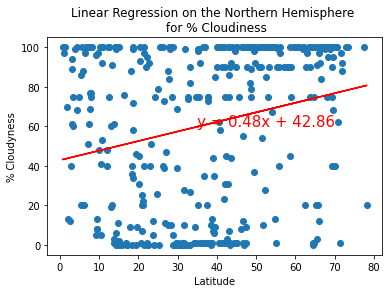

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudyness',(35,60))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

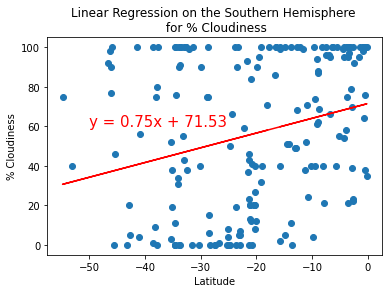

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

## Find the Correlation Between Latitude and Wind Speed

### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

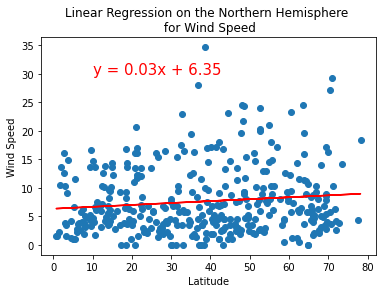

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,30))


### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

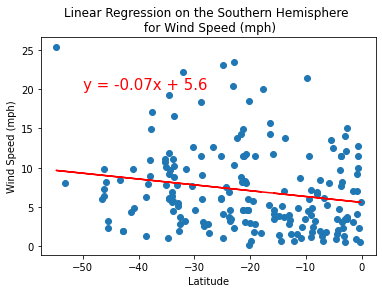

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
chart_title = "Linear Regression on the Southern Hemisphere \n for Wind Speed (mph)"

# Call the function.
plot_linear_regression(x_values, y_values, chart_title, 'Wind Speed (mph)', (-50,20))